# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [19]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

/var/folders/7t/bjx6ywvx6xl_vxwwz13b9rqh0000gn/T/ipykernel_99333/3972790099.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter as gauss
/var/folders/7t/bjx6ywvx6xl_vxwwz13b9rqh0000gn/T/ipykernel_99333/3972790099.py:8: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter as med


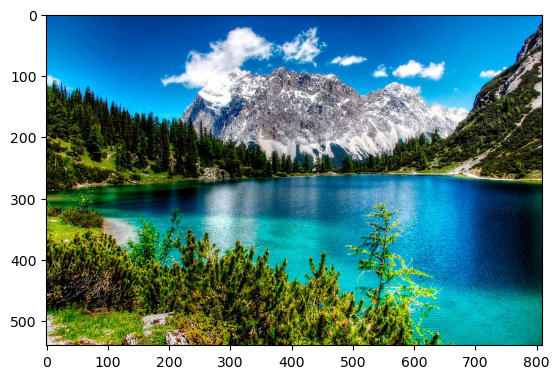

In [20]:
original_image = Image.open('image.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('img.npy', original_image)

#Load the image
original_image = np.load('img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image. 

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

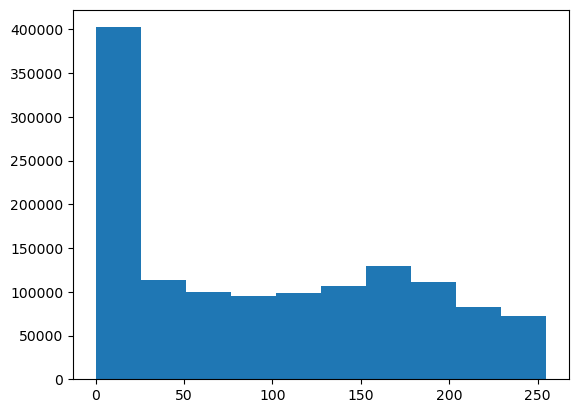

In [21]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

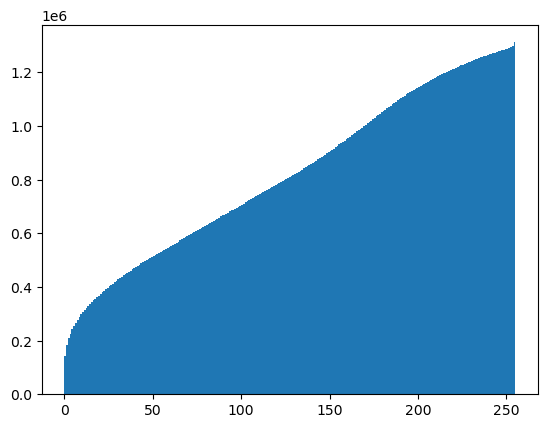

In [22]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

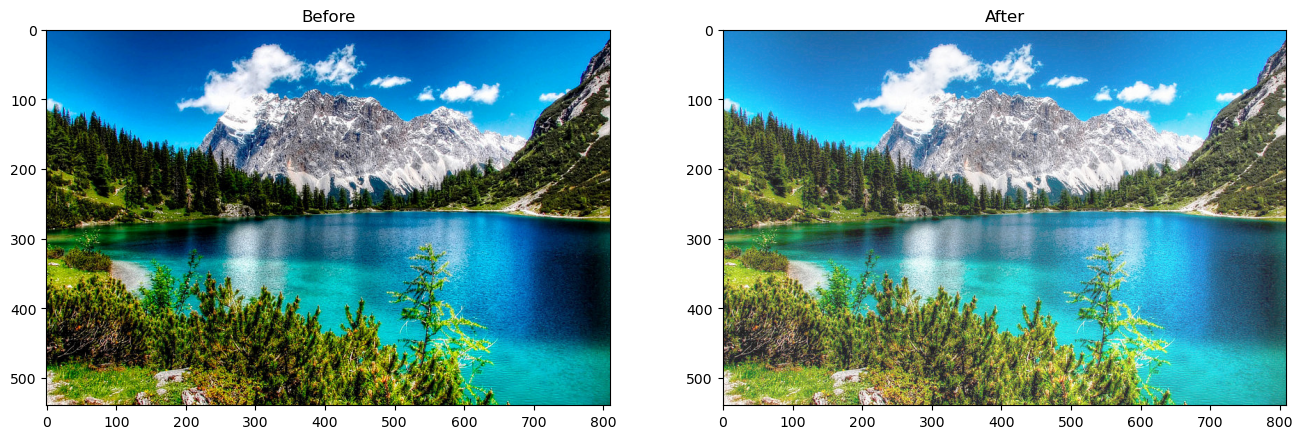

In [23]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

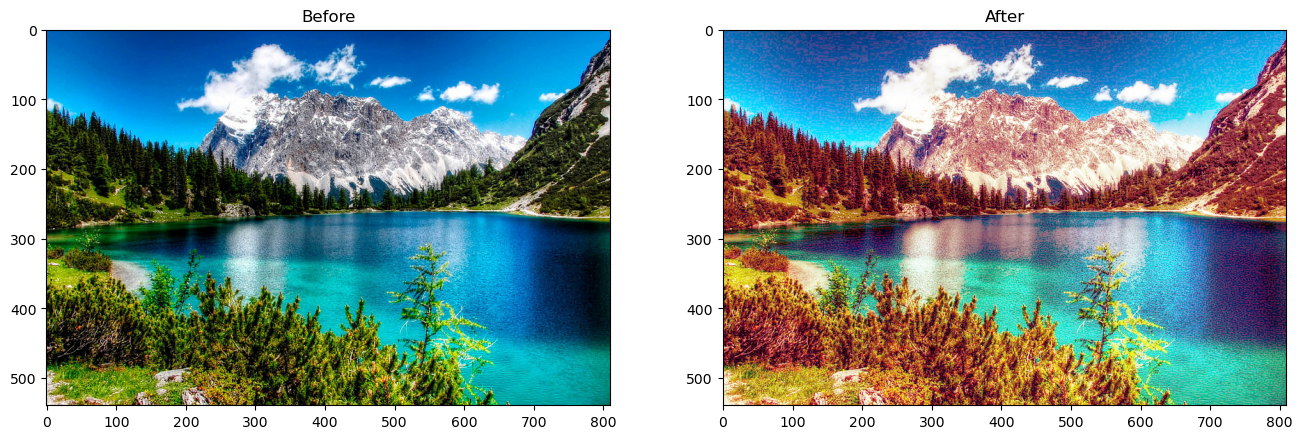

In [24]:
# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib
# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

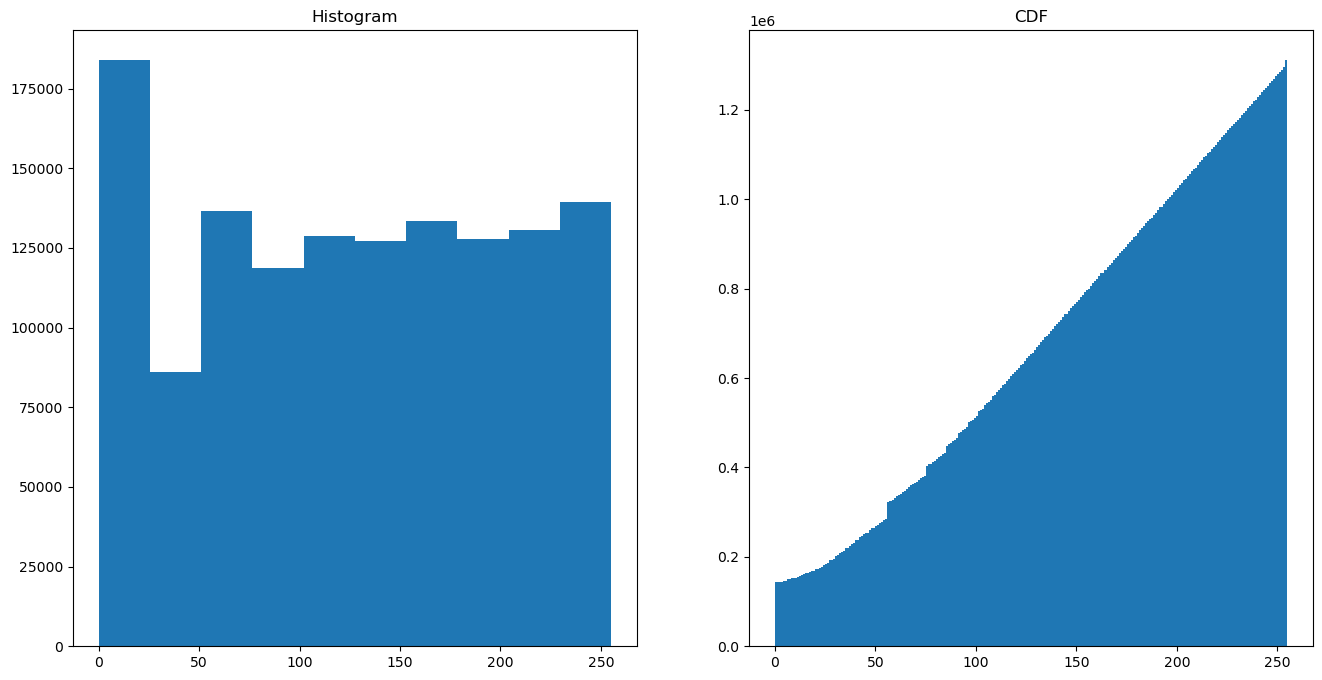

In [25]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

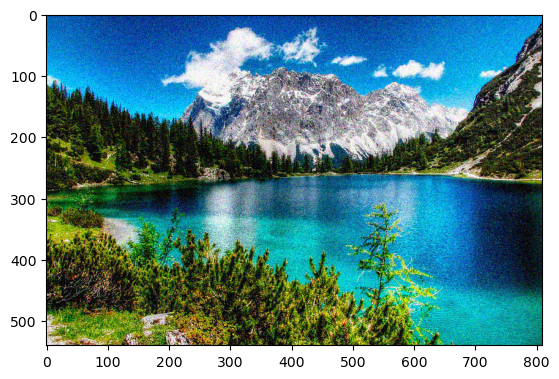

In [26]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

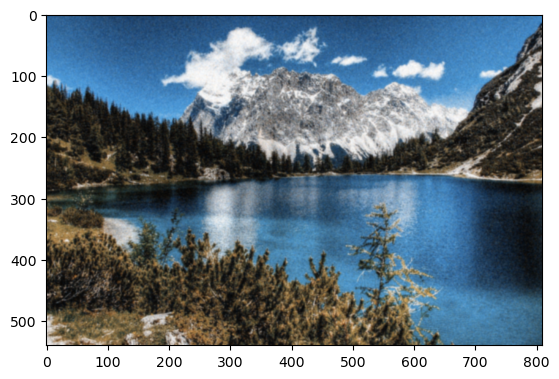

In [27]:
img3_gauss = gauss(img_n, sigma=1)   
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

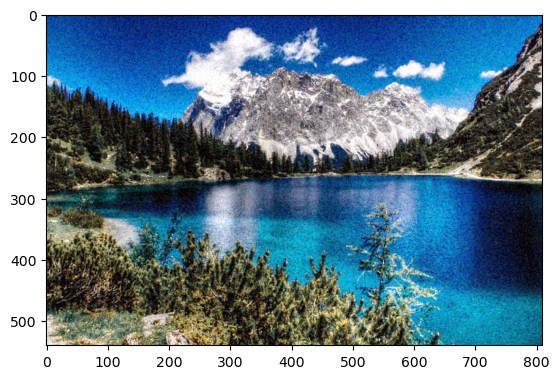

In [28]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [29]:
from image_slicer import slice

n = 4
slice('image.jpg', n)

(<Tile #1 - image_01_01.png>,
 <Tile #2 - image_01_02.png>,
 <Tile #3 - image_02_01.png>,
 <Tile #4 - image_02_02.png>)

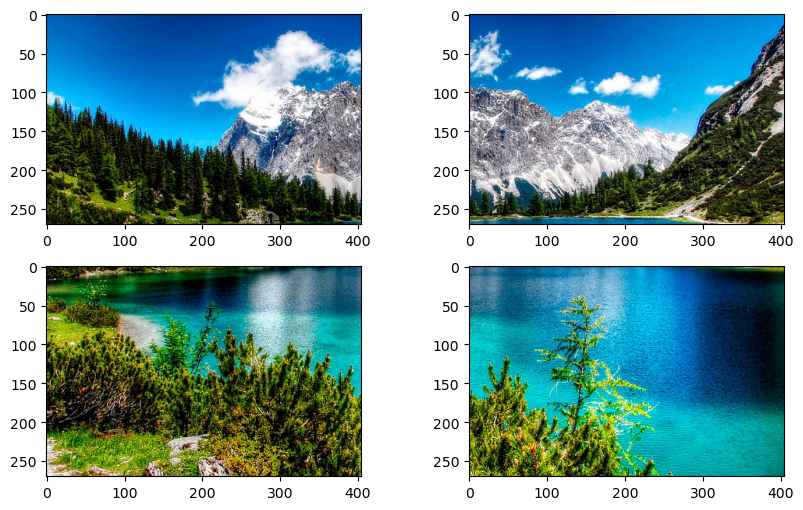

In [30]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img = Image.open(f'image_01_01.png')
img1_eq = exposure.equalize_hist(np.array(img))
plt.imshow(img)

plt.subplot(2,2,2)
img = Image.open(f'image_01_02.png')
img2_eq = exposure.equalize_hist(np.array(img))
plt.imshow(img)

plt.subplot(2,2,3)
img = Image.open(f'image_02_01.png')
img3_eq = exposure.equalize_hist(np.array(img))
plt.imshow(img)

plt.subplot(2,2,4)
img = Image.open(f'image_02_02.png')
img4_eq = exposure.equalize_hist(np.array(img))
plt.imshow(img)

plt.show()

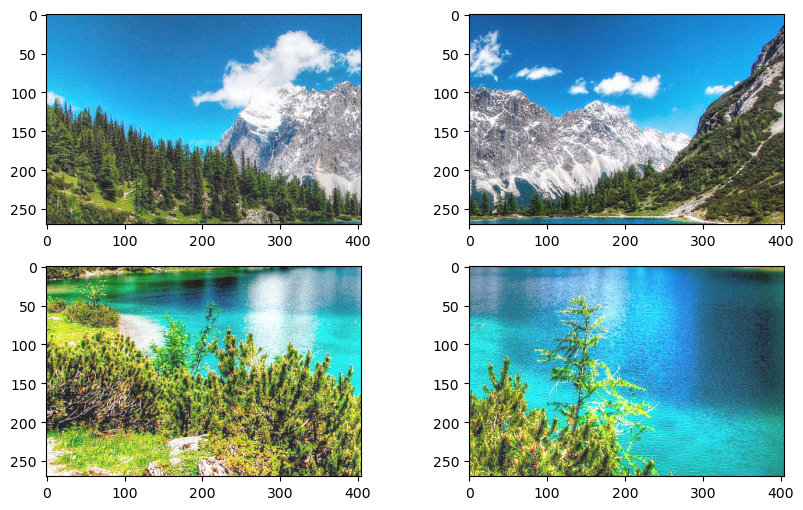

In [31]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.imshow(img1_eq)

plt.subplot(2,2,2)
plt.imshow(img2_eq)

plt.subplot(2,2,3)
plt.imshow(img3_eq)

plt.subplot(2,2,4)
plt.imshow(img4_eq)

plt.show()


## Tile-based histogram equalization

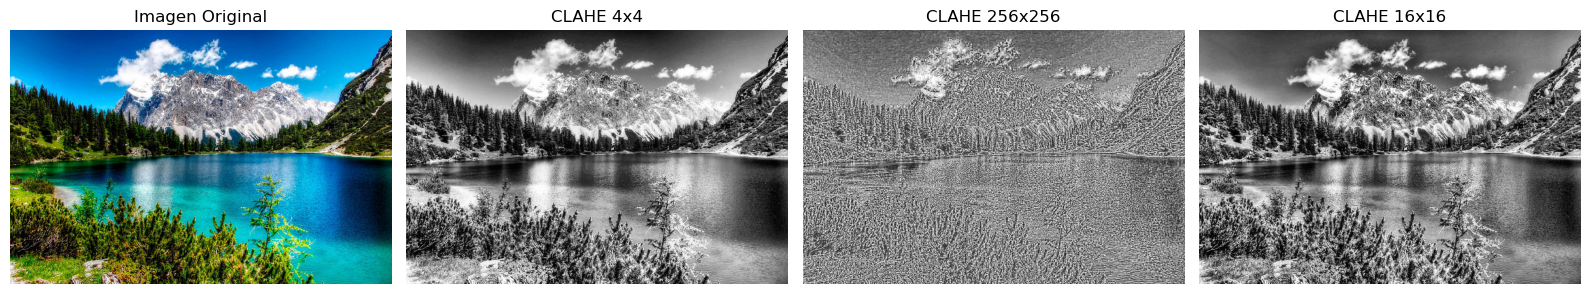

In [38]:
# Función para aplicar CLAHE con diferentes tamaños de mosaicos
def apply_clahe(image, tile_grid_size=(8, 8)):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Crear el objeto CLAHE con el tamaño de mosaico deseado
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=tile_grid_size)
    
    # Aplicar CLAHE
    enhanced_image = clahe.apply(gray_image)
    
    return enhanced_image

# Leer la imagen (asegúrate de subir la imagen al entorno de Google Colab)
image = cv2.imread('image.jpg')

# Probar CLAHE con diferentes tamaños de mosaico
tile_sizes = [(32, 32), (256, 256), (512, 512)]
results = [apply_clahe(image, size) for size in tile_sizes]

# Mostrar los resultados
plt.figure(figsize=(16, 8))
plt.subplot(1, len(tile_sizes) + 1, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

for i, (size, result) in enumerate(zip(tile_sizes, results)):
    plt.subplot(1, len(tile_sizes) + 1, i + 2)
    plt.title(f"CLAHE {size[0]}x{size[1]}")
    plt.imshow(result, cmap='gray')
    plt.axis("off")

plt.tight_layout()
plt.show()

## SWAHE

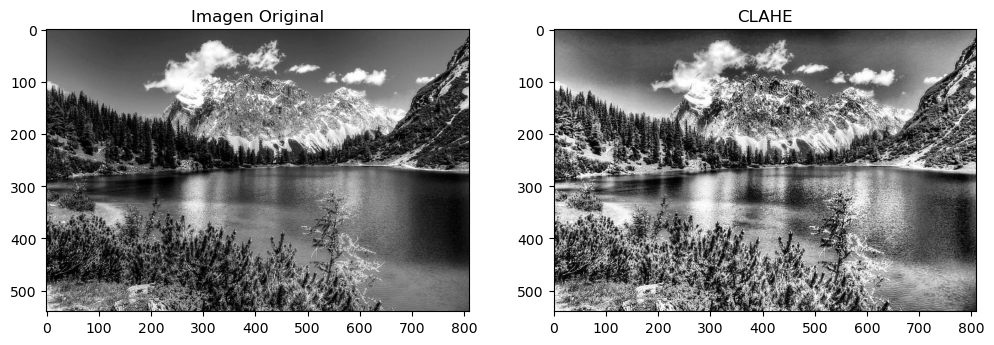

In [33]:
img = cv2.imread('image.jpg', 0)

# Crear un objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

# Aplicar CLAHE a la imagen
cl1 = clahe.apply(img)

fig = plt.figure(figsize=(12, 8))

plt.subplot(1,2,1),plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1,2,2),plt.imshow(cl1, cmap='gray')
plt.title('CLAHE')

plt.show()

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

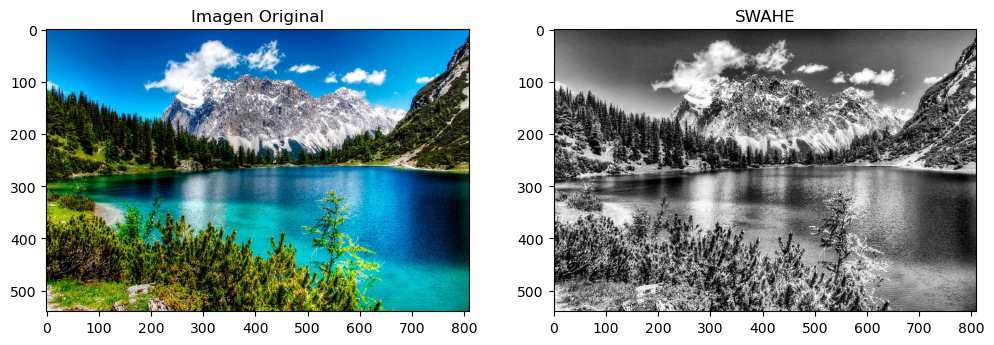

In [34]:
def sliding_window_ahe(image, tile_size=(8, 8), clip_limit=2.0):
    """
    Aplica Sliding Window Adaptive Histogram Equalization (AHE) a una imagen.

    :param image: Imagen de entrada en escala de grises.
    :param tile_size: Tamaño del bloque (ancho, alto) para AHE.
    :param clip_limit: Límite de recorte para CLAHE.
    :return: Imagen procesada con AHE.
    """
    # Convertir la imagen a escala de grises si no lo está
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Crear el objeto CLAHE con el tamaño de ventana especificado
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)

    # Aplicar CLAHE a la imagen
    equalized_image = clahe.apply(image)

    return equalized_image

# Leer la imagen de entrada
input_image = cv2.imread("image.jpg")

# Aplicar el AHE
tile_size = (8, 8)  # Tamaño del bloque (en píxeles)
output_image = sliding_window_ahe(input_image, tile_size)

# Mostrar la imagen original y la procesada
fig = plt.figure(figsize=(12, 8))

plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB) )
plt.title('SWAHE')


plt.show()